#Алгоритм Деревья Решений

## Содержание лекции:
1. Введение в деревья решений
2. Загрузка и предобработка данных
3. Построение базового дерева решений
4. Визуализация дерева решений
5. Анализ важности признаков
6. Настройка гиперпараметров
7. Кросс-валидация и оценка модели

## Введение в деревья решений

Деревья решений (Decision Trees) - это метод машинного обучения, который представляет собой иерархическую структуру, состоящую из узлов принятия решений. Каждый узел представляет собой правило вида "если условие, то решение", основанное на значениях признаков.

### Структура дерева решений:
1. **Корневой узел**: Начальная точка дерева, содержит все данные
2. **Внутренние узлы**: Точки принятия решений, где данные разделяются по определенному признаку
3. **Листовые узлы**: Конечные узлы, содержащие предсказание (класс или значение)
4. **Ветви**: Соединяют узлы, представляют возможные значения признаков

### Как происходит предсказание:
1. Начинаем с корневого узла
2. Проверяем условие в текущем узле
3. Переходим по соответствующей ветви на следующий узел
4. Повторяем, пока не достигнем листового узла
5. Возвращаем предсказание из листового узла

### Основные преимущества:
- Простота интерпретации (можно проследить путь принятия решений)
- Возможность работы с категориальными и числовыми данными
- Не требуют масштабирования данных
- Автоматический отбор важных признаков
- Способность моделировать нелинейные зависимости
- Наглядность процесса принятия решений

### Основные недостатки:
- Склонность к переобучению (особенно при большой глубине дерева)
- Нестабильность (малые изменения в данных могут сильно изменить структуру дерева)
- Возможные проблемы с обобщением
- Сложность улавливания некоторых типов зависимостей (например, XOR)

### Как работает дерево решений:
1. **Выбор признака для разбиения:**
   - Оценка информативности каждого признака
   - Выбор признака, обеспечивающего наилучшее разделение данных
   
2. **Разбиение данных:**
   - Создание правила на основе выбранного признака
   - Разделение данных на подмножества
   
3. **Рекурсивное построение:**
   - Повторение процесса для каждого подмножества
   - Продолжение до достижения условий остановки

4. **Условия остановки:**
   - Достижение максимальной глубины
   - Недостаточное количество примеров
   - Достижение чистоты узла (все примеры одного класса)

## Математические основы

### Процесс построения дерева

1. **Цель оптимизации:**
   Найти такое разбиение данных, которое максимизирует "чистоту" получаемых подмножеств.

2. **Понятие "чистоты":**
   - Чистое подмножество содержит объекты только одного класса
   - Грязное подмножество содержит объекты разных классов
   
### Критерии разбиения

1. **Индекс Джини (Gini Index)**:
   $$Gini = 1 - \sum_{i=1}^{c} (p_i)^2$$
   где $p_i$ - доля i-го класса в узле
   
   **Интерпретация:**
   - Значение 0 означает идеальное разделение (все объекты одного класса)
   - Значение 0.5 означает равномерное распределение классов
   - Чем меньше значение, тем лучше разделение

2. **Энтропия (Entropy)**:
   $$Entropy = -\sum_{i=1}^{c} p_i \log_2(p_i)$$
   где $p_i$ - доля i-го класса в узле
   
   **Интерпретация:**
   - Значение 0 означает идеальное разделение
   - Максимальное значение достигается при равномерном распределении
   - Мера неопределенности в узле

3. **Информационный выигрыш (Information Gain)**:
   $$IG(T, a) = H(T) - \sum_{v \in values(a)} \frac{|T_v|}{|T|} H(T_v)$$
   где:
   - $T$ - множество примеров
   - $a$ - признак
   - $H(T)$ - энтропия множества $T$
   - $T_v$ - подмножество $T$, где признак $a$ имеет значение $v$
   
   **Интерпретация:**
   - Показывает, насколько уменьшилась неопределенность после разбиения
   - Больший выигрыш означает лучшее разбиение
   - Используется для выбора оптимального признака для разбиения

### Процесс принятия решений:

1. **Выбор признака:**
   - Для каждого доступного признака вычисляем критерий качества разбиения
   - Выбираем признак с наилучшим значением критерия

2. **Создание правила:**
   - Для числовых признаков: создаем пороговое значение
   - Для категориальных признаков: создаем группы значений

3. **Рекурсивное построение:**
   - Повторяем процесс для каждой созданной ветви
   - Останавливаемся при достижении критериев остановки

In [10]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score, 
                                   learning_curve)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                           roc_curve, auc, precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля визуализации
sns.set_theme(style="whitegrid")  # Using seaborn's style settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Загрузка и предобработка данных

Для демонстрации работы с деревьями решений мы будем использовать набор данных о раке молочной железы (Breast Cancer Wisconsin Dataset). Этот датасет содержит различные характеристики клеточных ядер, полученных из цифровых изображений тонкоигольной аспирационной биопсии (FNA) молочной железы. Задача - классифицировать опухоли на злокачественные и доброкачественные.

### Характеристики датасета:
- 30 признаков, описывающих свойства клеточных ядер
- 2 класса: злокачественные (malignant) и доброкачественные (benign) опухоли
- 569 образцов

### Описание признаков:
Каждый признак представлен тремя значениями:
- mean (среднее)
- standard error (стандартная ошибка)
- worst (наихудшее/наибольшее значение)

для следующих характеристик:
1. radius (средний радиус)
2. texture (среднее отклонение значений серого)
3. perimeter (периметр)
4. area (площадь)
5. smoothness (локальные изменения радиуса)
6. compactness (периметр^2 / площадь - 1)
7. concavity (тяжесть вогнутых участков контура)
8. concave points (количество вогнутых участков контура)
9. symmetry (симметричность)
10. fractal dimension (фрактальная размерность)

Размер датасета: (569, 31)

Распределение классов:
   count  percentage
1    357   62.741652
0    212   37.258348

Статистический анализ признаков:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


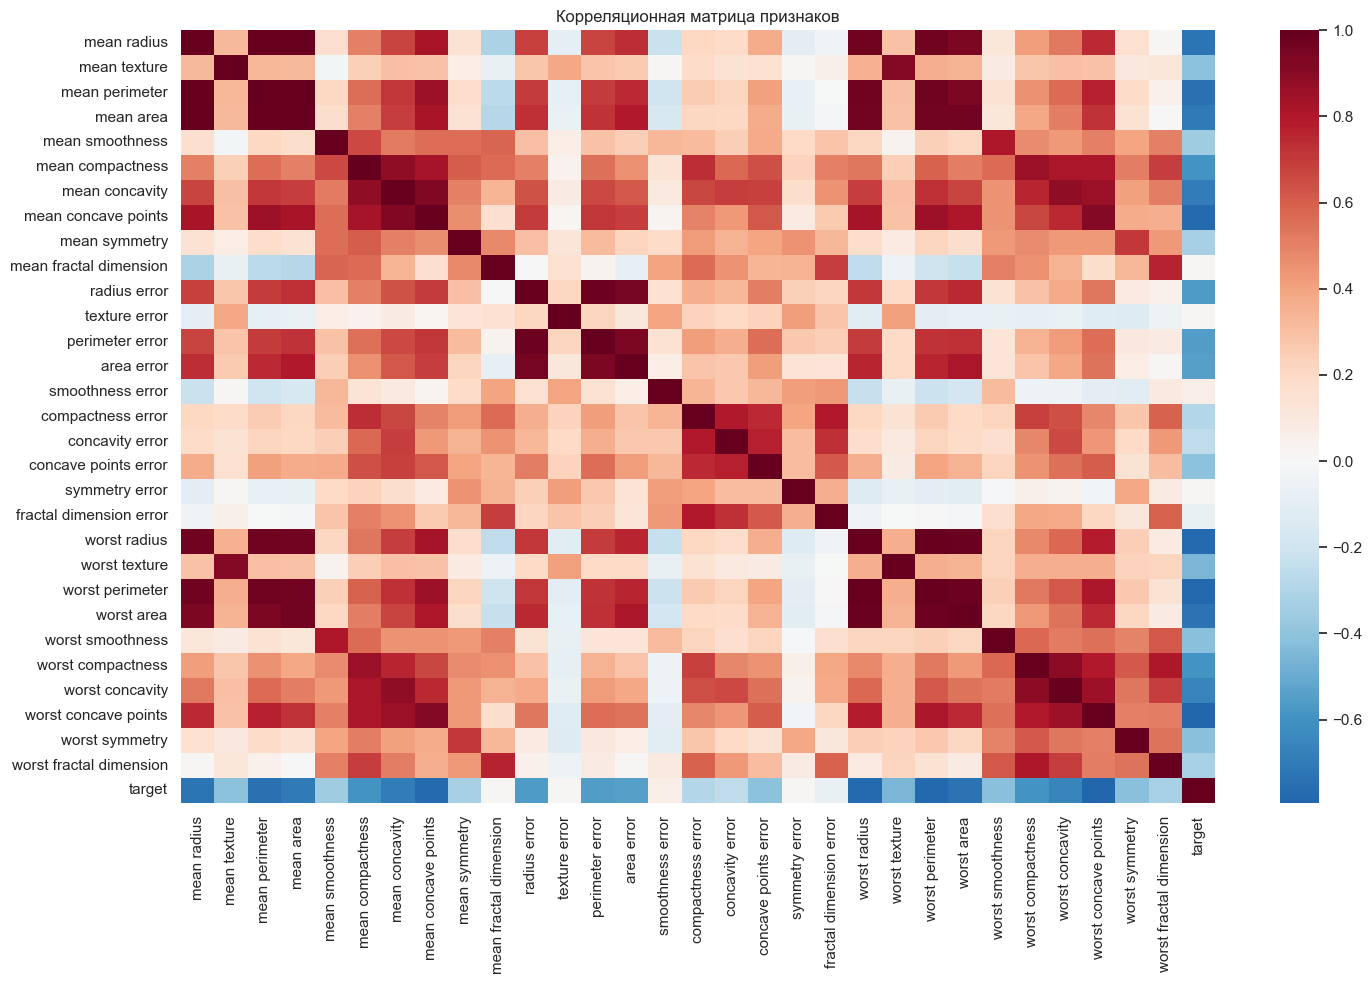

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [11]:
# Загрузка данных
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Базовый анализ данных
print("Размер датасета:", df.shape)
print("\nРаспределение классов:")
class_dist = pd.Series(data.target).value_counts()
print(pd.DataFrame({
    'count': class_dist,
    'percentage': class_dist / len(data.target) * 100
}))

# Статистический анализ признаков
stats = df.describe()
print("\nСтатистический анализ признаков:")
display(stats)

# Анализ корреляций между признаками
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='RdBu_r', center=0, annot=False)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

# Интерактивный анализ распределений признаков
def plot_feature_distributions(df, target):
    features = df.columns[:-1]  # Исключаем целевую переменную
    n_rows = (len(features) + 2) // 3  # Вычисляем количество строк
    
    fig = make_subplots(
        rows=n_rows,
        cols=3,
        subplot_titles=features,
        vertical_spacing=0.1
    )
    
    row = 1
    col = 1
    
    for feature in features:
        # Создаем гистограммы для каждого класса
        for target_val, name in zip([0, 1], ['malignant', 'benign']):
            fig.add_trace(
                go.Histogram(
                    x=df[df['target'] == target_val][feature],
                    name=name,
                    opacity=0.7,
                    nbinsx=30
                ),
                row=row,
                col=col
            )
        
        # Обновляем позицию для следующего графика
        col += 1
        if col > 3:
            col = 1
            row += 1
    
    fig.update_layout(
        height=300*n_rows,
        showlegend=True,
        title_text="Распределение признаков по классам"
    )
    
    return fig

# Визуализируем распределения
dist_fig = plot_feature_distributions(df, 'target')
dist_fig.show()

### Интерпретация базового анализа данных:

1. **Размер датасета:**
   - 569 образцов с 30 признаками
   - Сбалансированность классов важна для качества модели
   
2. **Распределение классов:**
   - Соотношение между злокачественными и доброкачественными случаями
   - Анализ баланса классов для оценки необходимости балансировки
   
3. **Статистический анализ:**
   - `mean`: центральная тенденция признаков
   - `std`: разброс значений
   - `min/max`: диапазон значений
   - `25%/50%/75%`: распределение значений (квартили)

4. **Корреляционная матрица:**
   - Красные области: положительная корреляция
   - Синие области: отрицательная корреляция
   - Интенсивность цвета: сила связи
   - Диагональ всегда = 1 (корреляция признака с самим собой)

5. **Распределение признаков:**
   - Форма распределения (нормальное, скошенное)
   - Перекрытие между классами (разделимость)
   - Выбросы и аномалии
   
Эти визуализации помогают понять:
- Качество и структуру данных
- Потенциальные проблемы (выбросы, пропуски)
- Возможные сложности в классификации
- Необходимость предобработки данных

## Построение базового дерева решений

### Основные параметры и их влияние

1. **criterion** {'gini', 'entropy'}: критерий расщепления
   - 'gini': использует индекс Джини (по умолчанию)
   - 'entropy': использует информационный выигрыш
   - Выбор критерия обычно мало влияет на результат

2. **max_depth**: максимальная глубина дерева
   - Определяет максимальное количество уровней в дереве
   - Меньшие значения предотвращают переобучение
   - Большие значения могут привести к переобучению
   - None означает рост до полного разделения

3. **min_samples_split**: минимальное количество образцов для разделения узла
   - Узел делится только если содержит больше образцов
   - Больше значение - меньше разбиений
   - Помогает предотвратить создание маленьких групп

4. **min_samples_leaf**: минимальное количество образцов в листовом узле
   - Определяет минимальный размер конечных групп
   - Больше значение - более общие правила
   - Меньше значение - более специфичные правила

5. **max_features**: максимальное число признаков для поиска лучшего разбиения
   - None: использовать все признаки
   - 'sqrt': квадратный корень из числа признаков
   - 'log2': логарифм по основанию 2 от числа признаков
   
### Этапы построения:

1. **Инициализация:**
   - Создание объекта DecisionTreeClassifier
   - Установка параметров модели

2. **Обучение:**
   - Передача обучающих данных
   - Построение структуры дерева
   - Определение правил разбиения

3. **Проверка:**
   - Оценка точности на тестовых данных
   - Анализ метрик качества
   - Выявление проблем (переобучение/недообучение)

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Создание и обучение базового дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Оценка точности на тестовой выборке
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {accuracy:.4f}")

# Вывод отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

Точность на тестовой выборке: 0.9123

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



### Интерпретация базовой модели:

1. **Точность на тестовой выборке:**
   - Показывает долю правильных предсказаний
   - Базовый ориентир для дальнейших улучшений
   - Оценка общей производительности модели

2. **Отчет о классификации содержит:**
   - **Precision (точность)**: доля правильных положительных предсказаний
     - Высокая precision означает мало ложных положительных
     - Важно для минимизации ненужных биопсий
   
   - **Recall (полнота)**: доля обнаруженных положительных случаев
     - Высокий recall означает мало пропущенных случаев
     - Критично для выявления злокачественных опухолей
   
   - **F1-score**: гармоническое среднее precision и recall
     - Сбалансированная метрика общей производительности
     - Учитывает оба типа ошибок
   
   - **Support**: количество образцов каждого класса
     - Показывает сбалансированность данных
     - Помогает интерпретировать другие метрики

3. **Общая интерпретация:**
   - Сравнение метрик между классами
   - Выявление проблемных случаев
   - Определение направлений для улучшения

## Визуализация дерева решений

### Компоненты визуализации:

1. **Узлы дерева содержат:**
   - Условие разбиения (например, "возраст <= 30")
   - Количество образцов в узле (samples)
   - Распределение классов (value)
   - Предсказанный класс (class)
   - Индекс Джини или энтропия (impurity)

2. **Цветовая кодировка:**
   - Интенсивность цвета показывает уверенность в предсказании
   - Разные цвета для разных классов
   - Более темный цвет = более чистый узел

3. **Ветви:**
   - True (≤) обычно идет влево
   - False (>) обычно идет вправо
   - Показывают путь принятия решений

### Что анализировать в визуализации:

1. **Структура дерева:**
   - Сбалансированность ветвей
   - Глубина различных путей
   - Сложность правил

2. **Качество разбиений:**
   - Количество образцов в узлах
   - Чистота узлов
   - Информативность признаков

3. **Пути принятия решений:**
   - Наиболее важные признаки (ближе к корню)
   - Последовательность проверок
   - Конечные предсказания

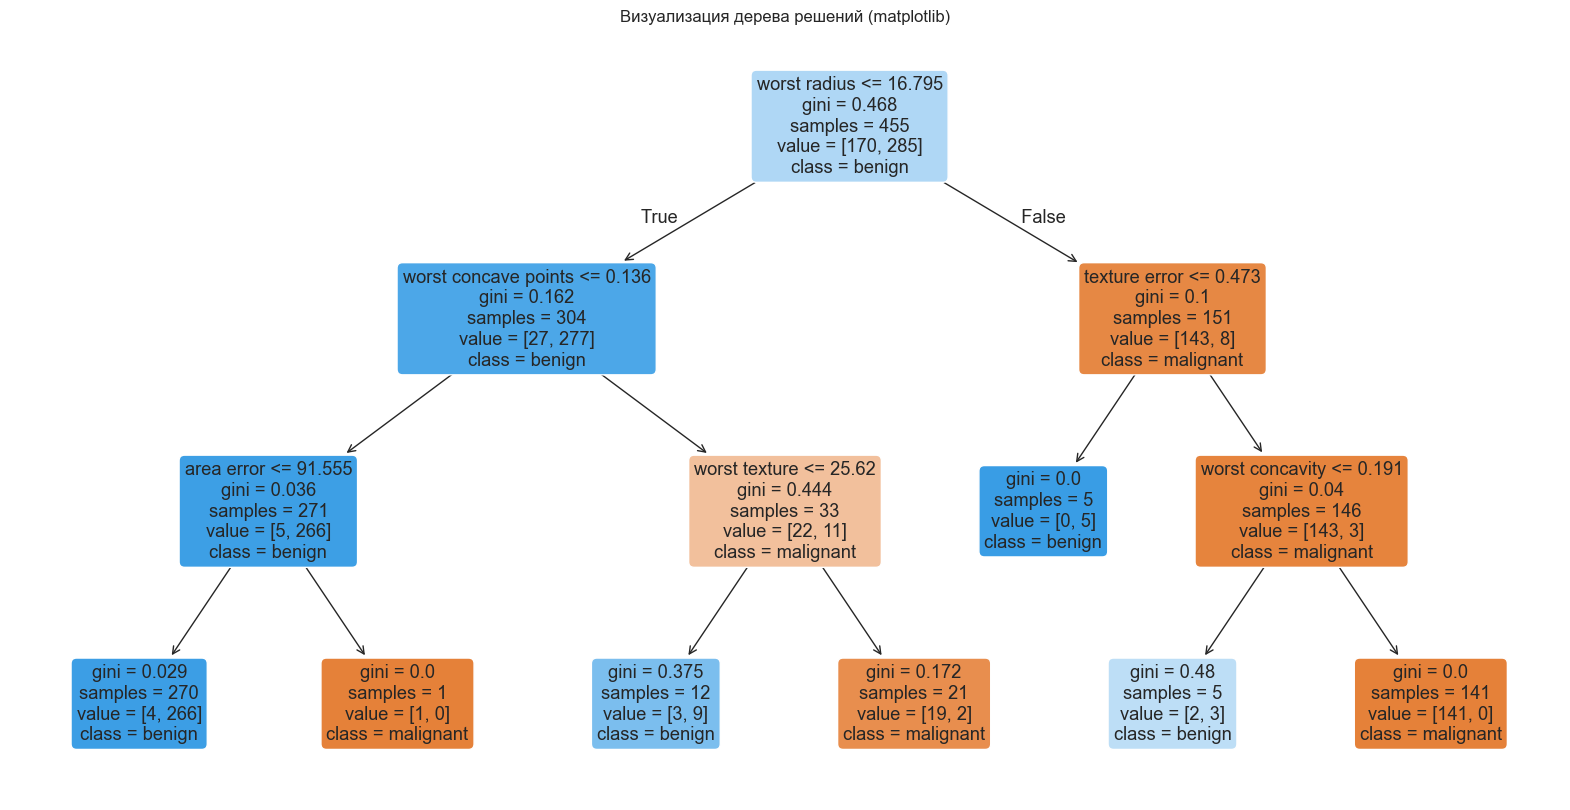

In [ ]:
# Создание дерева с ограниченной глубиной для визуализации
tree_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_viz.fit(X_train, y_train)

# Matplotlib визуализация
plt.figure(figsize=(20,10))
plot_tree(tree_viz, 
         feature_names=X.columns, 
         class_names=['malignant', 'benign'],
         filled=True, 
         rounded=True)
plt.title('Визуализация дерева решений (matplotlib)')
plt.show()

# Интерактивная визуализация с помощью Plotly
def plot_tree_structure(tree, feature_names, class_names):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    values = tree.tree_.value
    
    def get_node_info(node_id):
        if feature[node_id] != -2:  # не лист
            return (f"{feature_names[feature[node_id]]}<br>"
                   f"≤ {threshold[node_id]:.2f}")
        else:  # лист
            class_prob = values[node_id][0] / values[node_id][0].sum()
            pred_class = class_names[class_prob.argmax()]
            return f"Class: {pred_class}<br>Prob: {class_prob.max():.2f}"
    
    def get_tree_structure(node_id, x_pos, y_pos, layer_width):
        nodes = []
        edges = []
        
        if node_id == -1:
            return nodes, edges
        
        # Добавляем текущий узел
        nodes.append({
            'x': x_pos,
            'y': y_pos,
            'text': get_node_info(node_id),
            'samples': int(tree.tree_.n_node_samples[node_id])
        })
        
        # Рекурсивно обрабатываем детей
        if children_left[node_id] != -1:
            next_layer_width = layer_width * 0.5
            left_nodes, left_edges = get_tree_structure(
                children_left[node_id],
                x_pos - layer_width,
                y_pos - 1.5,
                next_layer_width
            )
            edges.append({
                'start': (x_pos, y_pos),
                'end': (x_pos - layer_width, y_pos - 1.5),
                'text': '≤'
            })
            nodes.extend(left_nodes)
            edges.extend(left_edges)
            
        if children_right[node_id] != -1:
            next_layer_width = layer_width * 0.5
            right_nodes, right_edges = get_tree_structure(
                children_right[node_id],
                x_pos + layer_width,
                y_pos - 1.5,
                next_layer_width
            )
            edges.append({
                'start': (x_pos, y_pos),
                'end': (x_pos + layer_width, y_pos - 1.5),
                'text': '>'
            })
            nodes.extend(right_nodes)
            edges.extend(right_edges)
            
        return nodes, edges
    
    # Получаем структуру дерева
    nodes, edges = get_tree_structure(0, 0, 0, 4)
    
    # Создаем визуализацию
    fig = go.Figure()
    
    # Добавляем ребра
    for edge in edges:
        fig.add_trace(go.Scatter(
            x=[edge['start'][0], edge['end'][0]],
            y=[edge['start'][1], edge['end'][1]],
            mode='lines',
            line=dict(color='gray'),
            hoverinfo='none',
            showlegend=False
        ))
        # Добавляем метки на ребрах
        fig.add_trace(go.Scatter(
            x=[(edge['start'][0] + edge['end'][0])/2],
            y=[(edge['start'][1] + edge['end'][1])/2],
            mode='text',
            text=[edge['text']],
            textposition='middle center',
            hoverinfo='none',
            showlegend=False
        ))
    
    # Добавляем узлы
    fig.add_trace(go.Scatter(
        x=[node['x'] for node in nodes],
        y=[node['y'] for node in nodes],
        mode='markers+text',
        marker=dict(
            size=[np.sqrt(node['samples'])*3 for node in nodes],
            color='lightblue',
            line=dict(color='black', width=1)
        ),
        text=[node['text'] for node in nodes],
        textposition='middle center',
        hoverinfo='text',
        showlegend=False
    ))
    
    fig.update_layout(
        title='Интерактивная визуализация дерева решений',
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white',
        height=600
    )
    
    return fig

# Создаем и отображаем интерактивную визуализацию
tree_fig = plot_tree_structure(tree_viz, X.columns, ['malignant', 'benign'])
tree_fig.show()

### Интерпретация визуализации дерева решений:

1. **Matplotlib визуализация:**
   - **Цветовая схема:**
     - Более темный цвет = более чистый узел
     - Разные цвета для разных классов
   - **Информация в узлах:**
     - Условие разбиения (признак и порог)
     - Количество образцов (samples)
     - Распределение классов (values)
     - Класс большинства (predicted class)

2. **Интерактивная Plotly визуализация:**
   - **Структура дерева:**
     - Размер узла пропорционален количеству образцов
     - Стрелки показывают направление решений
     - Интерактивные подсказки при наведении
   
   - **Анализ решений:**
     - Последовательность проверок условий
     - Глубина пути до принятия решения
     - Уверенность в предсказаниях

3. **Важные наблюдения:**
   - Признаки ближе к корню более важны
   - Сложность правил увеличивается с глубиной
   - Баланс между глубиной и обобщающей способностью

4. **Практические выводы:**
   - Основные признаки для принятия решений
   - Простота/сложность полученных правил
   - Потенциальные области переобучения

## Анализ важности признаков

Деревья решений позволяют оценить важность каждого признака для классификации. Важность определяется на основе того, насколько хорошо признак разделяет данные в каждом узле.

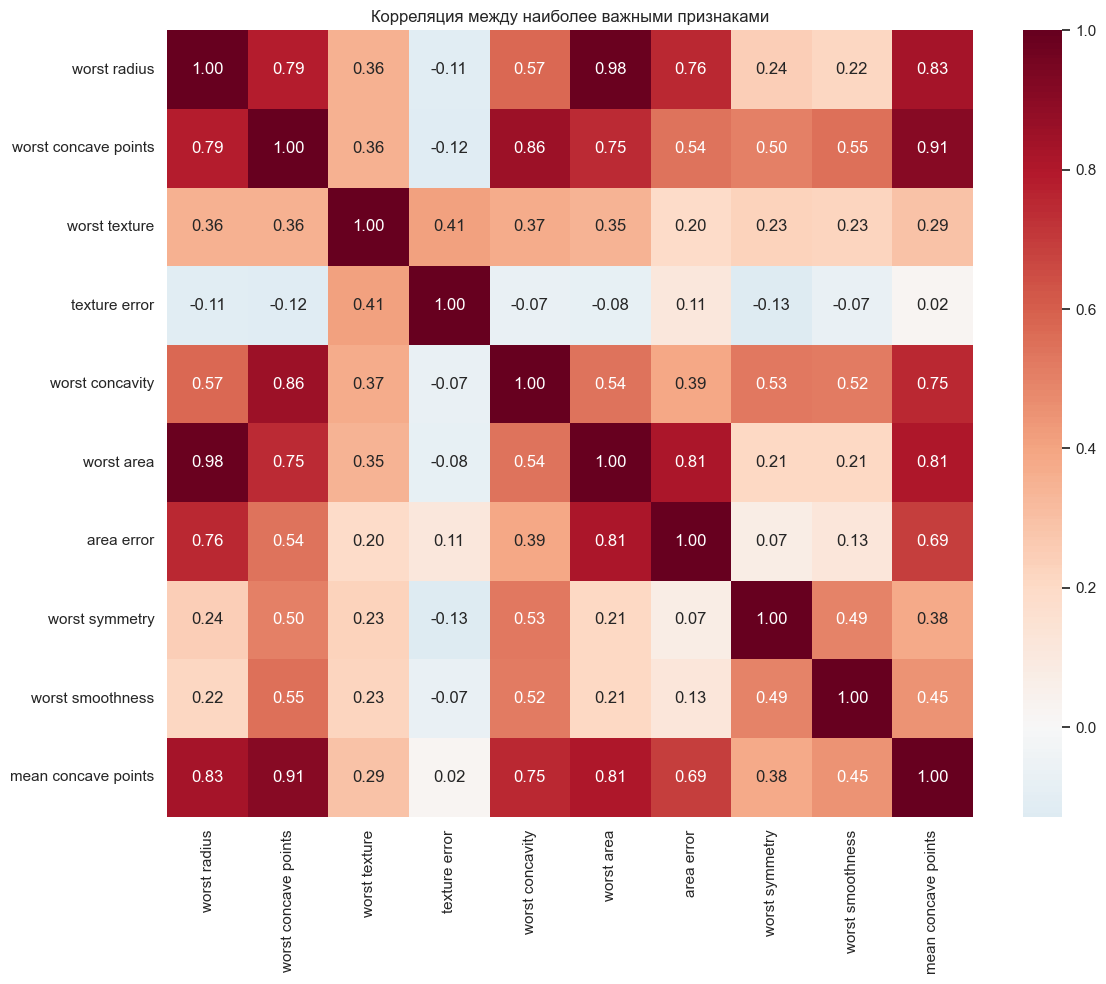

Топ 10 важных признаков и их статистики:


,feature,importance,mean,std,median
worst radius,worst radius,0.697811,16.269190,4.833242,14.97000
worst concave points,worst concave points,0.116083,0.114606,0.065732,0.09993
worst texture,worst texture,0.058881,25.677223,6.146258,25.41000
texture error,texture error,0.052661,1.216853,0.551648,1.10800
worst concavity,worst concavity,0.016325,0.272188,0.208624,0.22670
worst area,worst area,0.012678,880.583128,569.356993,686.50000
area error,area error,0.012085,40.337079,45.491006,24.53000
worst symmetry,worst symmetry,0.010733,0.290076,0.061867,0.28220
worst smoothness,worst smoothness,0.008452,0.132369,0.022832,0.13130
mean concave points,mean concave points,0.006261,0.048919,0.038803,0.03350


In [ ]:
# Анализ важности признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Создаем интерактивную визуализацию важности признаков
fig = go.Figure()

# Добавляем столбчатую диаграмму
fig.add_trace(go.Bar(
    x=feature_importance['importance'],
    y=feature_importance['feature'],
    orientation='h',
    marker=dict(
        color=feature_importance['importance'],
        colorscale='Viridis'
    )
))

# Настраиваем макет
fig.update_layout(
    title='Важность признаков в модели дерева решений',
    xaxis_title='Важность',
    yaxis_title='Признак',
    height=800
)

fig.show()

# Создаем тепловую карту важности признаков с их корреляциями
important_features = feature_importance['feature'].head(10).tolist()
correlation_matrix = df[important_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')
plt.title('Корреляция между наиболее важными признаками')
plt.tight_layout()
plt.show()

# Анализ взаимосвязи между важностью признаков и их статистическими характеристиками
feature_stats = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_clf.feature_importances_,
    'mean': X.mean(),
    'std': X.std(),
    'median': X.median()
})

# Создаем scatter plot с размером точек, пропорциональным стандартному отклонению
fig = px.scatter(feature_stats,
                x='mean',
                y='importance',
                size='std',
                text='feature',
                title='Взаимосвязь между важностью признаков и их статистическими характеристиками')

fig.update_traces(textposition='top center')
fig.show()

# Вывод числовых значений важности признаков
print("Топ 10 важных признаков и их статистики:")
display(feature_stats.sort_values('importance', ascending=False).head(10))

### Интерпретация анализа важности признаков:

1. **Столбчатая диаграмма важности:**
   - **Ось X**: количественная оценка важности
   - **Ось Y**: названия признаков
   - **Цветовая шкала**: дополнительная визуализация важности
   - **Интерпретация**: более длинные столбцы = более важные признаки

2. **Тепловая карта корреляций:**
   - **Цветовая схема:**
     - Красный: положительная корреляция
     - Синий: отрицательная корреляция
     - Интенсивность: сила связи
   - **Практическое значение:**
     - Выявление групп связанных признаков
     - Возможность уменьшения размерности
     - Понимание взаимозависимостей

3. **Scatter plot важности vs статистик:**
   - **Размер точек**: стандартное отклонение
   - **Положение**: связь между средним значением и важностью
   - **Выводы:**
     - Влияние распределения на важность
     - Роль вариативности признаков
     - Потенциальные выбросы

4. **Практическое применение:**
   - Отбор наиболее информативных признаков
   - Упрощение модели
   - Понимание процесса принятия решений
   - Направления для сбора новых данных

## Настройка гиперпараметров

Для улучшения производительности модели важно правильно настроить гиперпараметры. Основные параметры для настройки:

1. max_depth: максимальная глубина дерева
2. min_samples_split: минимальное количество образцов для разделения узла
3. min_samples_leaf: минимальное количество образцов в листе
4. max_features: максимальное количество признаков для поиска лучшего разделения

In [ ]:
# Определение параметров для поиска по сетке
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Обучение с поиском лучших параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и результатов
print("Лучшие параметры:", grid_search.best_params_)
print(f"Лучшая точность при кросс-валидации: {grid_search.best_score_:.4f}")

# Получение лучшей модели
best_model = grid_search.best_estimator_

# Оценка на тестовой выборке
test_score = best_model.score(X_test, y_test)
print(f"Точность лучшей модели на тестовой выборке: {test_score:.4f}")

# Сравнение с базовой моделью
base_score = tree_clf.score(X_test, y_test)
print(f"Точность базовой модели на тестовой выборке: {base_score:.4f}")

# Визуализация результатов поиска по сетке
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)

# Создаем более информативную визуализацию результатов
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=('Распределение точности по параметрам',
                                  'Влияние отдельных параметров'))

# График распределения точности
fig.add_trace(
    go.Scatter(
        x=list(range(len(results))),  # Преобразуем range в list
        y=results['mean_test_score'],
        error_y=dict(
            type='data',
            array=results['std_test_score'],
            visible=True
        ),
        mode='markers',
        name='Средняя точность'
    ),
    row=1, col=1
)

# Добавляем боксплоты для каждого параметра
params_to_plot = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion']
for i, param in enumerate(params_to_plot):
    param_scores = []
    param_values = []
    
    for value in param_grid[param]:
        mask = results[f'param_{param}'].astype(str) == str(value)
        scores = results[mask]['mean_test_score']
        param_scores.extend(scores)
        param_values.extend([str(value)] * len(scores))
    
    fig.add_trace(
        go.Box(
            y=param_scores,
            x=param_values,
            name=param,
            boxpoints='all',
            pointpos=0,
            jitter=0.3
        ),
        row=2, col=1
    )

fig.update_layout(
    title='Анализ результатов поиска по сетке',
    height=800,
    showlegend=True
)

# Обновляем заголовки осей
fig.update_xaxes(title_text='Комбинация параметров', row=1, col=1)
fig.update_yaxes(title_text='Точность (CV)', row=1, col=1)
fig.update_xaxes(title_text='Значение параметра', row=2, col=1)
fig.update_yaxes(title_text='Точность (CV)', row=2, col=1)

fig.show()

# Вывод детальных результатов для лучших комбинаций параметров
print("\nТоп-5 лучших комбинаций параметров:")
top_results = results.head()
for idx, row in top_results.iterrows():
    print(f"\nКомбинация {idx + 1}:")
    print(f"Точность (CV): {row['mean_test_score']:.4f} ± {row['std_test_score']:.4f}")
    params = {k.replace('param_', ''): v for k, v in row.items() if k.startswith('param_')}
    print("Параметры:", params)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Лучшая точность при кросс-валидации: 0.9385
Точность лучшей модели на тестовой выборке: 0.9211
Точность базовой модели на тестовой выборке: 0.9123



Топ-5 лучших комбинаций параметров:

Комбинация 11:
Точность (CV): 0.9385 ± 0.0192
Параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Комбинация 12:
Точность (CV): 0.9363 ± 0.0189
Параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Комбинация 25:
Точность (CV): 0.9341 ± 0.0120
Параметры: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

Комбинация 17:
Точность (CV): 0.9341 ± 0.0120
Параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}

Комбинация 35:
Точность (CV): 0.9341 ± 0.0120
Параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


### Интерпретация результатов поиска по сетке:

1. **Лучшие параметры:**
   - **max_depth**: оптимальная глубина дерева
     - Меньшие значения → более простая модель
     - Большие значения → более сложная модель
   
   - **min_samples_split**: минимальное число образцов для разбиения
     - Влияет на гранулярность решений
     - Помогает предотвратить переобучение
   
   - **min_samples_leaf**: минимальное число образцов в листе
     - Контролирует размер конечных групп
     - Влияет на стабильность предсказаний
   
   - **criterion**: критерий разбиения
     - Gini vs Entropy: разные подходы к оценке чистоты

2. **Анализ результатов:**
   - **Точность кросс-валидации:**
     - Средняя точность на разных подвыборках
     - Стабильность модели
   
   - **Сравнение с базовой моделью:**
     - Количественное улучшение
     - Оправданность усложнения

3. **Визуализация результатов:**
   - **График точности:**
     - Распределение результатов
     - Стабильность разных комбинаций
   
   - **Стандартное отклонение:**
     - Надежность результатов
     - Устойчивость модели

4. **Практические выводы:**
   - Компромисс между сложностью и точностью
   - Оптимальные настройки для данной задачи
   - Направления для дальнейшей оптимизации

## Кросс-валидация и оценка модели

Кросс-валидация помогает получить более надежную оценку производительности модели. Рассмотрим различные метрики оценки и их интерпретацию.

In [ ]:
# Анализ кривых обучения
def plot_learning_curves(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Создаем график с помощью plotly
    fig = go.Figure()
    
    # Добавляем кривые обучения
    fig.add_trace(go.Scatter(
        x=train_sizes,
        y=train_mean,
        name='Обучающая выборка',
        line=dict(color='blue'),
        mode='lines+markers'
    ))
    
    # Добавляем область стандартного отклонения для обучающей выборки
    fig.add_trace(go.Scatter(
        x=np.concatenate([train_sizes, train_sizes[::-1]]),
        y=np.concatenate([train_mean + train_std, (train_mean - train_std)[::-1]]),
        fill='toself',
        fillcolor='rgba(0,0,255,0.1)',
        line=dict(color='rgba(0,0,255,0)'),
        name='Стд. откл. (обучение)'
    ))
    
    # Добавляем кривую валидации
    fig.add_trace(go.Scatter(
        x=train_sizes,
        y=test_mean,
        name='Валидационная выборка',
        line=dict(color='red'),
        mode='lines+markers'
    ))
    
    # Добавляем область стандартного отклонения для валидационной выборки
    fig.add_trace(go.Scatter(
        x=np.concatenate([train_sizes, train_sizes[::-1]]),
        y=np.concatenate([test_mean + test_std, (test_mean - test_std)[::-1]]),
        fill='toself',
        fillcolor='rgba(255,0,0,0.1)',
        line=dict(color='rgba(255,0,0,0)'),
        name='Стд. откл. (валидация)'
    ))
    
    fig.update_layout(
        title='Кривые обучения',
        xaxis_title='Размер обучающей выборки',
        yaxis_title='Точность',
        hovermode='x'
    )
    
    return fig

# Построение кривых обучения
learning_curves_fig = plot_learning_curves(best_model, X, y)
learning_curves_fig.show()

# Получение прогнозов вероятностей для ROC и PR кривых
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Создаем ROC-кривую
fig_roc = go.Figure()

fig_roc.add_trace(go.Scatter(
    x=fpr, y=tpr,
    name=f'ROC кривая (AUC = {roc_auc:.3f})',
    mode='lines'
))

fig_roc.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    name='Случайное угадывание',
    mode='lines',
    line=dict(dash='dash')
))

fig_roc.update_layout(
    title='ROC-кривая',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    hovermode='x'
)

fig_roc.show()

# Precision-Recall кривая
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

fig_pr = go.Figure()

fig_pr.add_trace(go.Scatter(
    x=recall, y=precision,
    name=f'PR кривая (AUC = {pr_auc:.3f})',
    mode='lines'
))

fig_pr.update_layout(
    title='Precision-Recall кривая',
    xaxis_title='Recall',
    yaxis_title='Precision',
    hovermode='x'
)

fig_pr.show()

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

# Создаем аннотированную тепловую карту
fig_cm = go.Figure(data=go.Heatmap(
    z=cm,
    x=['Предсказан 0', 'Предсказан 1'],
    y=['Истинный 0', 'Истинный 1'],
    text=cm,
    texttemplate="%{text}",
    textfont={"size": 16},
    colorscale='Blues'
))

fig_cm.update_layout(
    title='Матрица ошибок',
    xaxis_title='Предсказанный класс',
    yaxis_title='Истинный класс'
)

fig_cm.show()

# Вывод полного отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


Отчет о классификации:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



### Интерпретация метрик оценки модели:

1. **Кривые обучения:**
   - **Обучающая кривая (синяя):**
     - Показывает качество подгонки к обучающим данным
     - Высокие значения могут указывать на переобучение
   
   - **Валидационная кривая (красная):**
     - Показывает обобщающую способность
     - Сходимость указывает на достаточность данных
   
   - **Области стандартного отклонения:**
     - Показывают стабильность результатов
     - Широкие области указывают на нестабильность

2. **ROC-кривая:**
   - **График:** True Positive Rate vs False Positive Rate
   - **AUC (площадь под кривой):**
     - 1.0 = идеальная модель
     - 0.5 = случайное угадывание
   - **Практическое значение:**
     - Способность модели различать классы
     - Компромисс между чувствительностью и специфичностью

3. **Precision-Recall кривая:**
   - **График:** Precision vs Recall
   - **AUC:**
     - Важна для несбалансированных классов
     - Показывает компромисс между точностью и полнотой
   - **Интерпретация:**
     - Высокий PR-AUC = хороший баланс между ошибками

4. **Матрица ошибок:**
   - **True Positives (правый нижний):**
     - Правильно определенные положительные случаи
   - **True Negatives (левый верхний):**
     - Правильно определенные отрицательные случаи
   - **False Positives (правый верхний):**
     - Ложные тревоги
   - **False Negatives (левый нижний):**
     - Пропущенные случаи

5. **Отчет о классификации:**
   - **Precision:** точность положительных предсказаний
   - **Recall:** полнота обнаружения положительных случаев
   - **F1-score:** баланс между precision и recall
   - **Support:** количество примеров каждого класса

6. **Практические выводы:**
   - Общая эффективность модели
   - Области для улучшения
   - Применимость в реальных условиях
   - Сравнение с другими моделями

## Заключение

В этой лекции мы рассмотрели:

1. Основные принципы работы деревьев решений
2. Математические основы (критерии разбиения)
3. Процесс построения и обучения модели
4. Методы визуализации деревьев
5. Анализ важности признаков
6. Настройку гиперпараметров
7. Оценку качества модели

### Преимущества деревьев решений:
- Интерпретируемость
- Способность работать с разными типами данных
- Автоматический отбор признаков
- Нелинейность модели

### Недостатки:
- Склонность к переобучению
- Нестабильность
- Сложность определения оптимальной глубины

### Рекомендации по использованию:
1. Всегда визуализируйте дерево для понимания его структуры
2. Используйте кросс-валидацию для оценки модели
3. Настраивайте гиперпараметры для оптимальной производительности
4. Рассмотрите использование ансамблевых методов для улучшения результатов